In [79]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, RandomRotation, RandomZoom, Lambda, Input
from keras.optimizers import Adam, RMSprop
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

In [2]:
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()

In [3]:
data_train = data_train / 255
data_test = data_test / 255

In [4]:
(data_train, data_valid) = data_train[5000:], data_train[:5000] 
(labels_train, labels_valid) = labels_train[5000:], labels_train[:5000]

In [5]:
labels_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Sweater',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandals',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

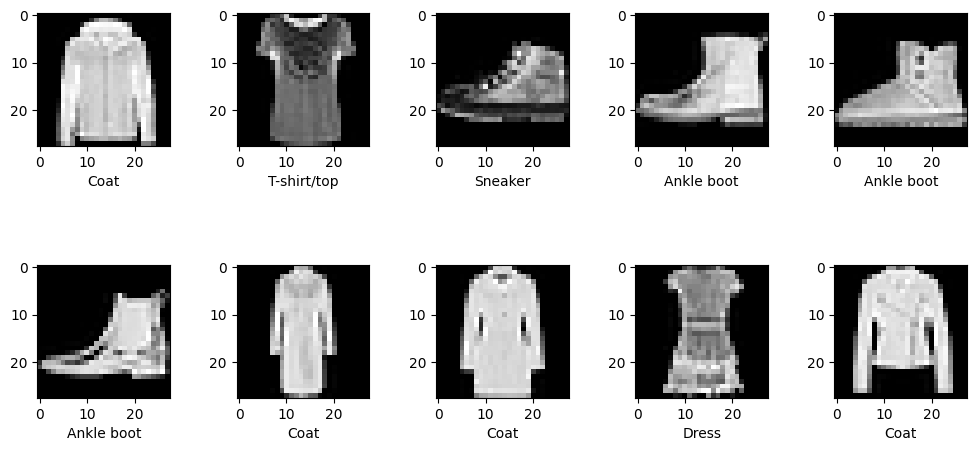

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5) 

for i in range(5):
    image = data_train[i]
    label = labels_dict[labels_train[i]]
    ax = axes[0][i]
    ax.imshow(image, cmap='gray')
    ax.set_xlabel(label)
    
for i in range(5, 10):
    image = data_train[i]
    label = labels_dict[labels_train[i]]
    ax = axes[1][i - 5] 
    ax.imshow(image, cmap='gray')
    ax.set_xlabel(label)
    
plt.show()

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu', kernel_regularizer=l2(0.1)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [9]:
history = model.fit(data_train, labels_train, epochs=10, batch_size=100, validation_data=(data_valid, labels_valid))

Epoch 1/10
550/550 [==============================] - 18s 31ms/step - loss: 2.0613 - accuracy: 0.6642 - val_loss: 0.6850 - val_accuracy: 0.7856
Epoch 2/10
550/550 [==============================] - 17s 32ms/step - loss: 0.7265 - accuracy: 0.7663 - val_loss: 0.6068 - val_accuracy: 0.8166
Epoch 3/10
550/550 [==============================] - 17s 31ms/step - loss: 0.6619 - accuracy: 0.7912 - val_loss: 0.5656 - val_accuracy: 0.8294
Epoch 4/10
550/550 [==============================] - 17s 30ms/step - loss: 0.6274 - accuracy: 0.8028 - val_loss: 0.5425 - val_accuracy: 0.8322
Epoch 5/10
550/550 [==============================] - 17s 32ms/step - loss: 0.6027 - accuracy: 0.8101 - val_loss: 0.5364 - val_accuracy: 0.8356
Epoch 6/10
550/550 [==============================] - 18s 32ms/step - loss: 0.5797 - accuracy: 0.8177 - val_loss: 0.4897 - val_accuracy: 0.8484
Epoch 7/10
550/550 [==============================] - 17s 30ms/step - loss: 0.5599 - accuracy: 0.8244 - val_loss: 0.4659 - val_accuracy:

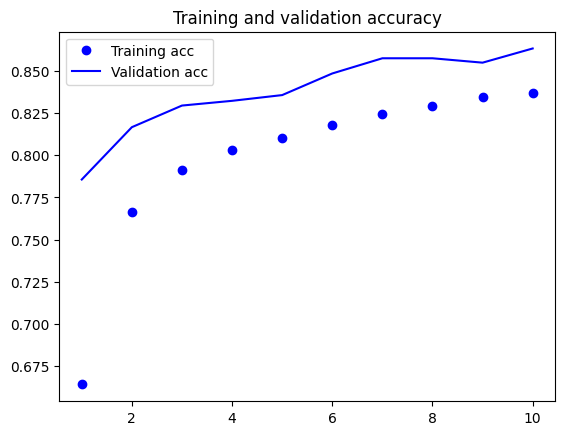

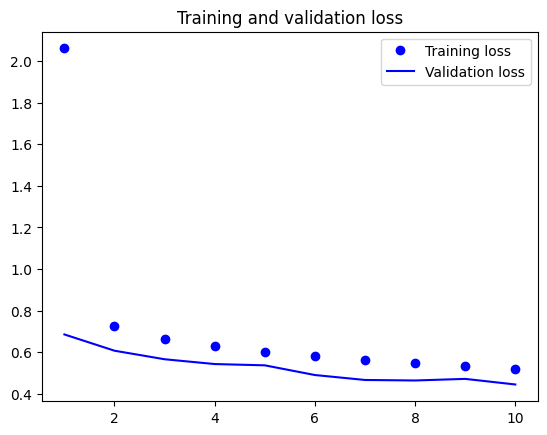

In [10]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [25]:
results = model.evaluate(data_test, labels_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.4780 - accuracy: 0.8514
[0.4780082106590271, 0.8514000177383423]


In [47]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

In [48]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [49]:
y_train = utils.to_categorical(y_train)
y_test =utils.to_categorical(y_test)

In [50]:
x_train=np.reshape(x_train, (-1,28,28,1))
x_test=np.reshape(x_test, (-1,28,28,1))

In [51]:
resized_x_train = tf.image.resize(x_train, (32,32))
resized_x_test = tf.image.resize(x_test, (32,32))

resized_x_train.shape, x_train.shape

(TensorShape([60000, 32, 32, 1]), (60000, 28, 28, 1))

In [52]:
from keras.preprocessing.image import img_to_array
train_X = np.asarray([img_to_array(im) for im in resized_x_train])
test_X = np.asarray([img_to_array(im) for im in resized_x_test])

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(train_X,
                                                           y_train,
                                                           test_size=0.2,
                                                           random_state=13
                                                           )

In [54]:
train_generator = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    rescale=1./255
)

In [55]:
train_generator.fit(x_train)
test_generator.fit(x_val)

In [56]:
train_generator = train_generator.flow(x_train,y_train,batch_size=200)
test_generator = test_generator.flow(x_val,y_val,batch_size=200)

In [88]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [58]:

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block3_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [91]:
from keras import models
from keras import layers


original_dim = (32, 32, 3)
target_size = (150, 150)


model = models.Sequential()
model.add(layers.Input(original_dim))
model.add(layers.Lambda(lambda image: tf.image.resize(image, target_size)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_6 (Lambda)           (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_7 (Dropout)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2097408   
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 10)               

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='best_weights.hdf5',verbose=1, save_best_only= True)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(1e-4),
              metrics=['acc'])

history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=100,
                    validation_data=test_generator,
                    validation_steps=60,
                    shuffle=True,
                    callbacks=[checkpointer])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()

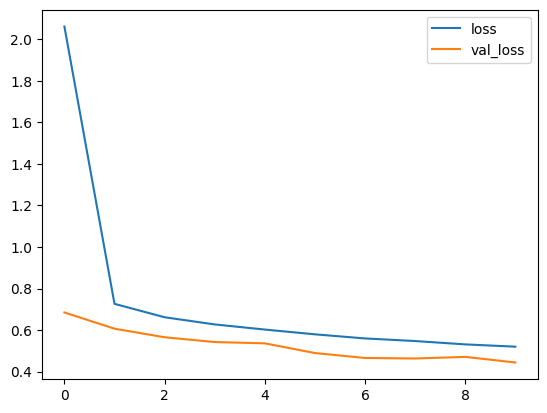

In [82]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [83]:
x_test = tf.image.resize(x_test,(150,150))

In [84]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

test_generator.fit(x_test)

test_generator = test_generator.flow(
        x_test,
        y_test,
        batch_size=200)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

InvalidArgumentError: Graph execution error:

Detected at node sequential_6/vgg16/block1_conv1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 604, in run_forever

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\2305672681.py", line 12, in <module>

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2272, in evaluate

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 4079, in run_step

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1893, in test_step

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5397, in relu

input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_6/vgg16/block1_conv1/Relu}}]] [Op:__inference_test_function_592262]

In [85]:
model = keras.models.load_model('best_weights.hdf5')

OSError: No file or directory found at best_weights.hdf5

In [86]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

test_generator.fit(x_test)

test_generator = test_generator.flow(
        x_test,
        y_test,
        batch_size=200)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

InvalidArgumentError: Graph execution error:

Detected at node sequential_6/vgg16/block1_conv1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 604, in run_forever

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code

  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5004\2305672681.py", line 12, in <module>

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2272, in evaluate

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 4079, in run_step

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1893, in test_step

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 589, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py", line 321, in call

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5397, in relu

input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_6/vgg16/block1_conv1/Relu}}]] [Op:__inference_test_function_592262]